# Priprema podataka za klasifikaciju različitim klasifikatorima 

In [46]:
import pandas as pd
import numpy as np

 ### Učitavanje prethodno već obrađenih podataka

In [38]:
data = pd.read_csv('elektrokonverzija_obradjeno.csv', index_col=0)
data

,Broj,godine starosti,stariji od 65,Pol,Datum elektrokonverzije,indikacija: perzistentna,ukupno trajanje AF (kada je prvi put dijagnostikovana) u mesecima,trajanje ove epizode AF u mesecima,frekvenca komora na prijemnom EKG-u,Blok grane,...,Amiodaron.1,Propafen.1,Flekainid.1,Sotalol.1,Digoksin.1,ASA.1,OAKT.1,Plavix.1,Statin.1,Održavanje sinusnog ritma nakon godinu dana
0,1,78,1,1,2014-01-21,1,5,5,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,61,0,1,2014-01-29,2,24,1,7,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,65,1,1,2014-02-10,1,4,4,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,64,0,1,2014-02-14,1,288,2,7,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,65,1,2,2014-03-06,1,48,3,9,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,646,61,0,1,2019-10-29,2,2,2,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
143,647,58,0,1,2019-10-31,2,12,2,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
144,648,72,1,2,2019-11-06,1,20,20,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
145,649,39,0,1,2019-11-27,2,48,1,9,0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0


### Ciljni atribut
Ciljni atribut je poslednja kolona, koja govori da li je uspešno održan sinusni ritam nakon godinu dana, ili ne.
On ima vrednosti 0 ili 1.
Te vrednosti mapiramo u istinitosne vrednosti (True i False).

In [39]:
odrzavanje = data.iloc[:, -1]
odrzavanje = odrzavanje.map(lambda x: bool(x))
data.iloc[:, -1] = odrzavanje
data

,Broj,godine starosti,stariji od 65,Pol,Datum elektrokonverzije,indikacija: perzistentna,ukupno trajanje AF (kada je prvi put dijagnostikovana) u mesecima,trajanje ove epizode AF u mesecima,frekvenca komora na prijemnom EKG-u,Blok grane,...,Amiodaron.1,Propafen.1,Flekainid.1,Sotalol.1,Digoksin.1,ASA.1,OAKT.1,Plavix.1,Statin.1,Održavanje sinusnog ritma nakon godinu dana
0,1,78,1,1,2014-01-21,1,5,5,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
1,2,61,0,1,2014-01-29,2,24,1,7,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
2,3,65,1,1,2014-02-10,1,4,4,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
3,4,64,0,1,2014-02-14,1,288,2,7,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
4,5,65,1,2,2014-03-06,1,48,3,9,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,646,61,0,1,2019-10-29,2,2,2,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
143,647,58,0,1,2019-10-31,2,12,2,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,True
144,648,72,1,2,2019-11-06,1,20,20,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,False
145,649,39,0,1,2019-11-27,2,48,1,9,0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,True


Možemo da primetimo da ima više pacijenata kod kojih nije bilo uspešno održavanje sinusnog ritma. 
Međutim, nije drastična razlika u broju pacijenata kod kojih nije uspešno održan sinusni ritam, i onih kod kojih jeste.

In [47]:
vrednost,kolicina = np.unique(odrzavanje, return_counts=True)
suma = np.sum(kolicina)

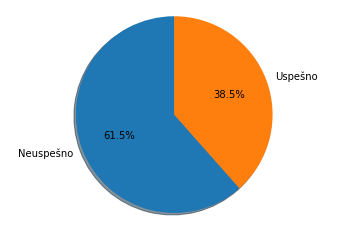

In [48]:
from matplotlib import pyplot as plt

labels = 'Neuspešno', 'Uspešno'
sizes = kolicina
fig, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

### Analiza autributa

Uklanjamo atribute kojima su sve vrednosti 0 i atribut koji predstavlja datum kada je pacijentu odrađena elektrokonverzija, jer ne utiču na klasifikaciju.

In [49]:
columns_to_remove=[]
for column in data.columns:
    if(list(data[column]).count(0) == 130):
        columns_to_remove.append(column)
columns_to_remove

['Digoksin.1']

In [50]:
data = data.drop(columns_to_remove, axis=1)
data = data.drop('Datum elektrokonverzije', axis=1)
data

,Broj,godine starosti,stariji od 65,Pol,indikacija: perzistentna,ukupno trajanje AF (kada je prvi put dijagnostikovana) u mesecima,trajanje ove epizode AF u mesecima,frekvenca komora na prijemnom EKG-u,Blok grane,dimenzija LPK,...,Ca antagonisti.1,Amiodaron.1,Propafen.1,Flekainid.1,Sotalol.1,ASA.1,OAKT.1,Plavix.1,Statin.1,Održavanje sinusnog ritma nakon godinu dana
0,1,78,1,1,1,5,5,0,3,42,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
1,2,61,0,1,2,24,1,7,0,42,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,False
2,3,65,1,1,1,4,4,0,3,47,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
3,4,64,0,1,1,288,2,7,0,50,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
4,5,65,1,2,1,48,3,9,0,49,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,646,61,0,1,2,2,2,0,3,36,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
143,647,58,0,1,2,12,2,0,3,45,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,True
144,648,72,1,2,1,20,20,6,0,43,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,False
145,649,39,0,1,2,48,1,9,0,35,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,True


Ispitujemo korelaciju atributa sa ciljnim atributom.

In [51]:
korelacija = data.corr()
ciljni_korelacija = korelacija.iloc[:, -1]
ciljni_korelacija.sort_values(ascending=False, key=abs)

Održavanje sinusnog ritma nakon godinu dana              1.000000
Furosemid (ne - 0)                                       0.242487
Drugi diuretik.1                                        -0.241523
Digoksin                                                 0.220401
Drugi diuretik                                          -0.219767
                                                           ...   
jačina struje sa kojom je učinjena uspešna konverzija   -0.016716
SCD (Structural heart disease)                          -0.015394
pušenje                                                  0.013989
EDD LK                                                  -0.006706
ACE inhibitori                                           0.002440
Name: Održavanje sinusnog ritma nakon godinu dana, Length: 69, dtype: float64

Normalizujemo podatke i proveravamo disperziju atributa nakon normalizacije. Ni jedna disperzija nije previše mala.

In [52]:
from sklearn.preprocessing import normalize

norm = normalize(data, axis=0)
norm = pd.DataFrame(norm, data.index, data.columns)

var = np.var(norm, axis=0)
var.sort_values(ascending=False)

Sotalol                     0.007633
Sotalol.1                   0.007633
Plavix.1                    0.007574
Plavix                      0.007574
Flekainid                   0.007515
                              ...   
godine starosti             0.000232
dimenzija LPK               0.000120
sinhroni, bifazni DC šok    0.000118
Elektrokonverzija           0.000111
EDD LK                      0.000110
Length: 69, dtype: float64

Razmatramo koliko su klase razdvojive na osnovu grafičkog prikaza rasprostanjenosti obe klase.
Primenjujemo dimenzionu redukciju kako bismo mogli da predstavimo klase, i za to koristimo analizu glavnih komponenti (PCA).
PCA je tehnika kojom se višedimenzioni skup razlaže na niz ortogonalnih komponenti. Prvi atribut transformisanog skupa najbolje objašnjava polazni skup atributa, i tako redom do poslednjeg, koji najmanje dobro opisuje polazni skup. 

In [53]:
from sklearn.decomposition import PCA

podaci = data.iloc[:, :-1]

pca = PCA()

data_pca = pd.DataFrame(pca.fit_transform(podaci),
                      index = data.index,
                      columns = [f'pca{i}' for i in range(1, data.shape[1])])

data_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68
0,-206.668587,-34.938681,-5.186064,6.189073,-15.066399,-2.481681,-6.181765,-1.658242,-0.222733,4.320141,...,-0.052961,0.059312,-0.018457,0.001032,-0.078802,-0.005532,-0.035935,-0.033653,-9.715140e-15,-3.751758e-14
1,-205.832479,-15.779796,-9.794470,6.159377,1.743918,-0.043257,-4.223537,-5.390411,0.568481,-2.609862,...,0.052357,0.071166,-0.031490,0.085746,-0.032162,-0.043843,-0.035327,-0.054803,4.641696e-15,5.545838e-14
2,-204.727551,-35.506781,-5.843981,-5.563220,-4.201374,4.067021,-0.950043,-0.065086,1.289717,4.549272,...,-0.008387,0.023818,-0.029161,-0.051872,-0.058284,-0.074900,-0.053427,-0.030898,-2.518345e-14,4.453272e-14
3,-206.081738,248.342426,2.952758,4.093682,-0.637469,1.683550,0.646314,-0.159609,-0.384959,0.639136,...,0.010690,-0.051695,-0.104723,0.093845,-0.026870,0.019907,-0.026144,0.014648,5.442668e-15,-2.556187e-14
4,-203.029265,7.792296,-7.960563,21.010040,-1.035049,0.888430,0.007284,-3.324700,-1.870468,-4.026710,...,-0.103872,-0.140448,0.244003,0.073810,0.046331,0.014592,0.046109,-0.018531,1.269745e-14,-1.163147e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,438.254293,-32.382595,-0.657740,-9.724598,2.261656,-2.392273,-4.988218,-4.125181,2.077657,3.779265,...,-0.022640,-0.076290,-0.085791,-0.104682,0.061269,-0.086376,0.014178,-0.017152,2.206640e-14,2.647196e-14
143,439.151890,-22.629029,-0.406765,-0.299204,5.791211,3.270711,0.371934,-2.789359,0.480847,4.773224,...,0.067572,-0.033239,0.043153,-0.016162,0.065128,0.066812,0.051893,0.079697,-7.873062e-15,2.541397e-14
144,440.195603,-15.862374,-1.567898,33.604871,-4.070354,-10.878827,-2.938811,10.264407,3.700758,-3.391447,...,-0.061495,0.056349,-0.045274,-0.001171,0.028254,0.024424,-0.017520,0.015754,-1.065610e-15,-6.593911e-16
145,440.832347,14.271101,-4.788831,-22.081956,22.479015,-2.898712,-0.694610,-3.653831,-0.069768,-4.142551,...,-0.031380,-0.022226,0.074980,-0.039209,0.017740,-0.030472,-0.020314,-0.024867,2.048252e-14,-3.372349e-15


In [54]:
pca_vr = pd.Series(pca.explained_variance_ratio_,
                index = data_pca.columns)
pca_vr

pca1     9.243154e-01
pca2     6.149826e-02
pca3     6.637815e-03
pca4     3.578104e-03
pca5     2.117219e-03
             ...     
pca64    5.787167e-08
pca65    3.980210e-08
pca66    2.599496e-08
pca67    9.226471e-33
pca68    9.226471e-33
Length: 68, dtype: float64

Vidimo da je dovoljno uzeti prva dva, odnosno tri atributa, kako bismo predstavili rasprostranjenost klasa u 2D, odnosno 3D.
Na osnovu grafičkog prikaza rasprostranjenosti klasa, možemo da zaključimo da klase baš i nisu najbolje razdvojive.

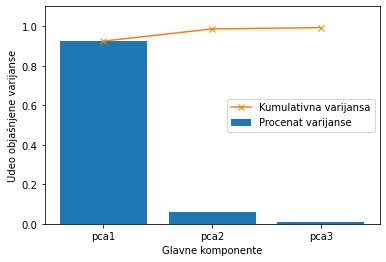

In [55]:
data_pca = data_pca.iloc[:, :3]
pca_vr = pca_vr[:3]

def objasni(data, pca_vr):
    plt.ylim(top=1.1)

    plt.bar(data_pca.columns, pca_vr,
            label = 'Procenat varijanse')
    
    plt.plot(data_pca.columns, np.cumsum(pca_vr),
             color = 'tab:orange',
             label = 'Kumulativna varijansa', 
             marker = 'x')

    plt.xlabel('Glavne komponente')
    plt.ylabel('Udeo objašnjene varijanse')
    
    plt.legend()

    plt.show()

objasni(data_pca, pca_vr)

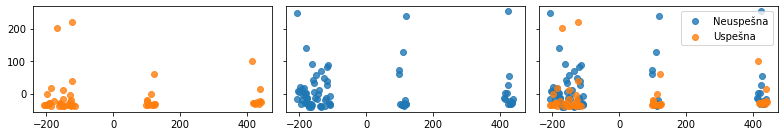

In [56]:
_, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(11, 2))

for i in range(3):
    ax = axs[i]
    
    if i != 0:
        ax.scatter(data_pca[~odrzavanje].iloc[:, 0],
                   data_pca[~odrzavanje].iloc[:, 1],
                   color='tab:blue', alpha=.8,
                   label='Neuspešna')
    
    if i != 1:
        ax.scatter(data_pca[odrzavanje].iloc[:, 0],
                   data_pca[odrzavanje].iloc[:, 1],
                   color='tab:orange', alpha=.8,
                   label='Uspešna')

plt.legend()
plt.tight_layout()

plt.show()

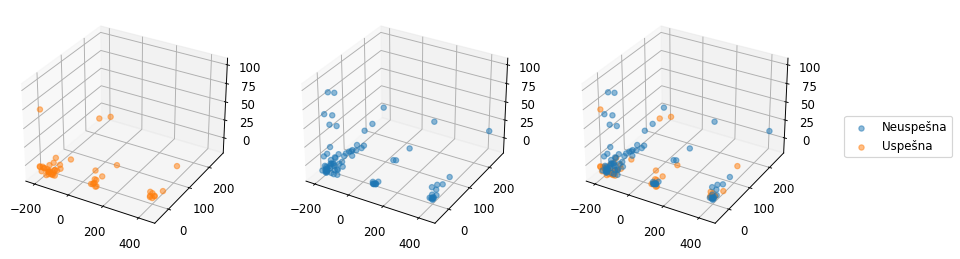

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 3))

for i in range(131, 134):
    ax = fig.add_subplot(i, projection='3d')
    
    if i != 131:
        ax.scatter(data_pca[~odrzavanje].iloc[:, 0],
                   data_pca[~odrzavanje].iloc[:, 1],
                   data_pca[~odrzavanje].iloc[:, 2],
                   color='tab:blue', alpha=.5,
                   label='Neuspešna')
    
    if i != 132:
        ax.scatter(data_pca[odrzavanje].iloc[:, 0],
                   data_pca[odrzavanje].iloc[:, 1],
                   data_pca[odrzavanje].iloc[:, 2],
                   color='tab:orange', alpha=.5,
                   label='Uspešna')

x = ax.get_xlim3d()
y = ax.get_ylim3d()
z = ax.get_zlim3d()

for ax in fig.get_axes():
    ax.set_xlim3d(x)
    ax.set_ylim3d(y)
    ax.set_zlim3d(z)

plt.legend(loc=(1.2, 0.35))
plt.tight_layout()

plt.show()

### Čuvanje obrađenih podataka.

In [57]:
data.to_csv('PodaciZaKlasifikaciju.csv')